In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('all_price2.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2115

In [5]:
results['Abyssal_whip'].keys()

dict_keys(['endMAE', 'startLoss', 'opt_params', 'perfect', 'momentum_model', 'model_opt', 'sma', 'testPrices', 'buyAndHold', 'numPrices', 'item', 'startMAE', 'numEpochs', 'budget', 'model', 'stochOscil_model', 'stochOscil', 'opt_days', 'predictions', 'persist', 'sma_model', 'momentum', 'model_days', 'endLoss'])

In [6]:
sma = [(item,results[item]['sma']) for item in results]
sma = sorted(sma, key=lambda x: x[1], reverse=True)

sma_model = [(item,results[item]['sma_model']) for item in results]
sma_model = sorted(sma_model, key=lambda x: x[1], reverse=True)

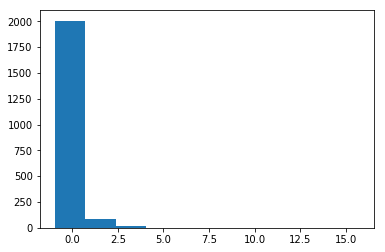

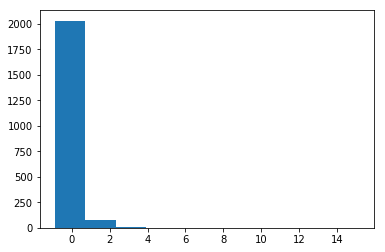

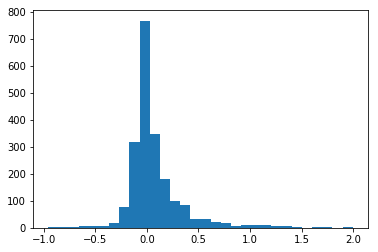

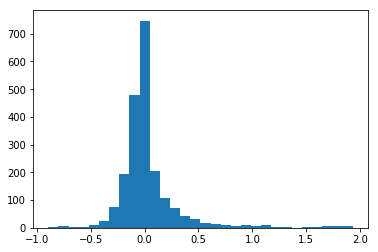

In [7]:
plt.hist([a[1] for a in sma])
plt.show()
plt.hist([a[1] for a in sma_model])
plt.show()
plt.hist([a[1] for a in sma if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in sma_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [8]:
numSMA = len([a for a in sma if a[1]>0])
numSMA_model = len([a for a in sma_model if a[1]>0])

In [9]:
print(len(results))
print(numSMA/len(results))
print(numSMA_model/len(results))

2115
0.5016548463356973
0.35697399527186763


In [10]:
stochOscil = [(item,results[item]['stochOscil']) for item in results]
stochOscil = sorted(stochOscil, key=lambda x: x[1], reverse=True)

stochOscil_model = [(item,results[item]['stochOscil_model']) for item in results]
stochOscil_model = sorted(stochOscil_model, key=lambda x: x[1], reverse=True)

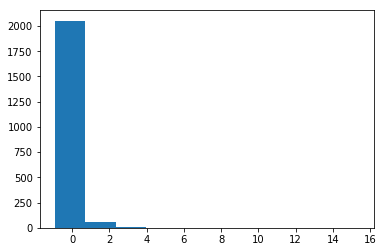

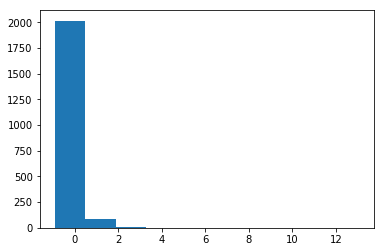

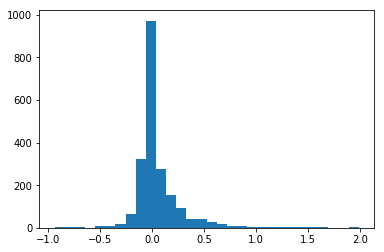

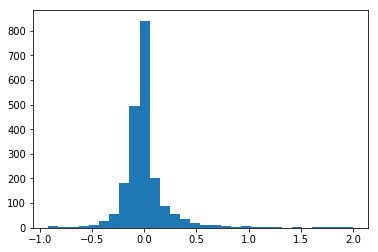

In [11]:
plt.hist([a[1] for a in stochOscil])
plt.show()
plt.hist([a[1] for a in stochOscil_model])
plt.show()
plt.hist([a[1] for a in stochOscil if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in stochOscil_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [12]:
numstochOscil = len([a for a in stochOscil if a[1]>0])
numstochOscil_model = len([a for a in stochOscil_model if a[1]>0])

In [13]:
print(len(results))
print(numstochOscil/len(results))
print(numstochOscil_model/len(results))

2115
0.4397163120567376
0.3380614657210402


In [14]:
momentum = [(item,results[item]['momentum']) for item in results]
momentum = sorted(momentum, key=lambda x: x[1], reverse=True)

momentum_model = [(item,results[item]['momentum_model']) for item in results]
momentum_model = sorted(momentum_model, key=lambda x: x[1], reverse=True)

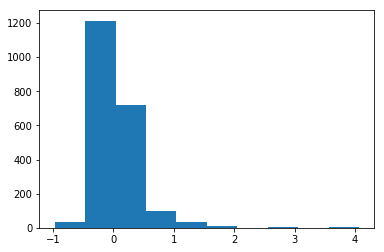

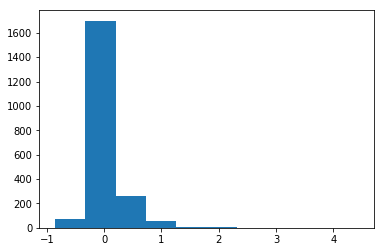

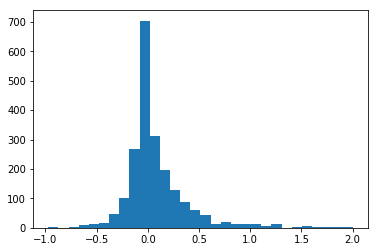

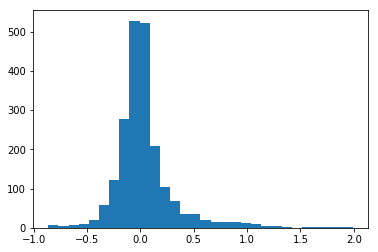

In [15]:
plt.hist([a[1] for a in momentum])
plt.show()
plt.hist([a[1] for a in momentum_model])
plt.show()
plt.hist([a[1] for a in momentum if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in momentum_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [16]:
nummomentum = len([a for a in momentum if a[1]>0])
nummomentum_model = len([a for a in momentum_model if a[1]>0])

In [17]:
print(len(results))
print(nummomentum/len(results))
print(nummomentum_model/len(results))

2115
0.4983451536643026
0.4160756501182033


In [18]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [19]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.014934481683761058
bl,price -0.05144175220748756
prof,pers 0.47587307924154965
profs,perf -0.05498265011497731
profs,bah 0.6237613281138139
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.20196197099505825
profdiff,mae 0.05915224955947585


In [20]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [21]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.008783465227588003
bl,price -0.05144175220748756
prof,pers 0.4141202539756858
profs,perf -0.037826043961764075
profs,bah 0.6035232503673789
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.1831468812431142
profdiff,mae 0.05915224955947585


In [22]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [23]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.004253726075931554
bl,price -0.05144175220748756
prof,pers 0.3215644585190623
profs,perf -0.021005981111603306
profs,bah 0.5270249527111416
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.13347610042911615
profdiff,mae 0.05915224955947585


In [24]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [25]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.003568646506356578
bl,price -0.05144175220748756
prof,pers 0.2668045636793476
profs,perf 0.02007940565081238
profs,bah 0.6746931048915382
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.09946470874317608
profdiff,mae 0.05915224955947585
